This notebook aims at **testing the two-layer Arctic hypothesis**. We expected the surface current in the main Arctic (Canada Basin + Makarov Basin) goes in cyclonic way and anti-cyclonic in deeper layer.

Therefore, this notebook plots the surface layer and the salinity maximum layer to see whether the hypothesis is right or not. 

**Conclusion: The surface current is not going in a cyclonic way. Have to say this hypothesis is not right at the first place..:(. But the good news is that the simulated flow is very closed to the geostrophic pattern, which means 'geostrophic flow' might be the answer to our original question - why the flow goes in an anti-cyclonic way.**

In [1]:
import copy,os,glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from ArcticTools import hovmoller as hov
from ArcticTools import geostropic as geo
% matplotlib inline

In [16]:
import seaborn as sn
import seawater as sw

import warnings
warnings.filterwarnings('ignore')

In [17]:
import importlib
importlib.reload(hov)

<module 'ArcticTools.hovmoller' from '/ocean/xiaoxiny/research/tools/ArcticTools/hovmoller.py'>

In [18]:
with nc.Dataset(sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/min_ice/para60Run/result/ENG319582008.nc'))[0]) \
as ptrc:
    nav_lon = ptrc.variables['nav_lon'][:,:]
    nav_lat = ptrc.variables['nav_lat'][:,:]
    dep  =  ptrc.variables['deptht'][:]


tmask = nc.Dataset(
        '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc')
mbathy = tmask.variables['mbathy'][0,400:,:]
tmask = tmask.variables['tmask'][0,:,400:,:]


bathy = nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy = bathy.variables['Bathymetry'][400:,:]

In [19]:
uvel = nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridU_19692008.nc')
vvel = nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridV_19692008.nc')

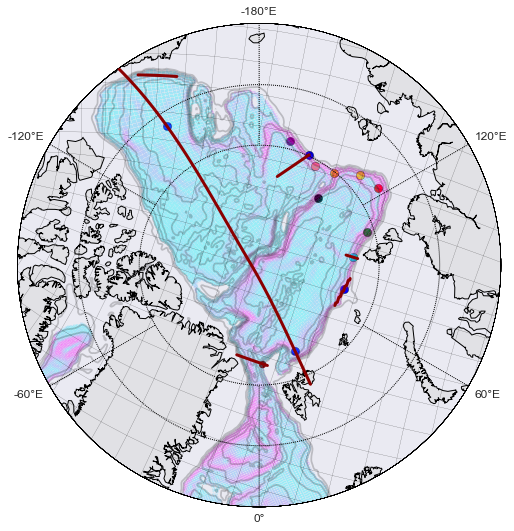

In [33]:
# test functions above
fig  =  plt.figure(figsize = (13/1.5,13/1.5))
ax  =  fig.add_subplot()
m,x_lon,y_lat = hov.mapping(70)


# extra points
x_mb1,y_mb1,a_mb1,b_mb1 = hov.section(x0 = -105,y0 = 303,length = 1,xi = 1,yi = -1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_mb1[0],b_mb1[0], s=70,c='purple')

x_nb0,y_nb0,a_nb0,b_nb0 = hov.section(x0 = -170,y0 = 365,length = 10,xi = 0,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb0[5],b_nb0[5], s=70, c='cyan')
m.plot(a_nb0[:],b_nb0[:],color = 'darkred',linewidth = 3)

x_nb1,y_nb1,a_nb1,b_nb1 = hov.section(x0 = -150,y0 = 375,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb1[0],b_nb1[0], s=70, c='green')

x_nb2,y_nb2,a_nb2,b_nb2 = hov.section(x0 = -120,y0 = 373,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb2[0],b_nb2[0], s=70,c='r')

x_nb3,y_nb3,a_nb3,b_nb3 = hov.section(x0 = -115,y0 = 358,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb3[0],b_nb3[0], s=70,c='gold')

x_nb4,y_nb4,a_nb4,b_nb4 = hov.section(x0 = -118,y0 = 340,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb4[0],b_nb4[0], s=70,c='orange')

x_mb2,y_mb2,a_mb2,b_mb2 = hov.section(x0 = -117,y0 = 325,length = 1,xi = 1,yi = -1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_mb2[0],b_mb2[0], s=70,c='salmon')

x_lr,y_lr,a_lr,b_lr = hov.section(x0 = -137,y0 = 333,length = 1,xi = 1,yi = -1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_lr[0],b_lr[0], s=70,c='k')



#sec1 Makarov
x_mb,y_mb,a_mb,b_mb = hov.section(x0 = -130,y0 = 300,length = 20,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.plot(a_mb[:],b_mb[:],color = 'darkred',linewidth = 3)
#m.scatter(a_mb[15],b_mb[15],color = 'darkred',linewidth = 3)
m.scatter(a_mb[-1],b_mb[-1], s=70)

#sec2 Nansen
x_ns,y_ns,a_ns,b_ns = hov.section(x0 = -210,y0 = 368,length = 25,xi = 1,yi = 0.2, x_lon=x_lon, y_lat=y_lat)
m.plot(a_ns[:],b_ns[:],color = 'darkred',linewidth = 3)
m.scatter(a_ns[-10],b_ns[-10], s=70)
#m.scatter(a_ns[15],b_ns[15],color = 'darkred',linewidth = 3)


#sec3 CB
x_cb,y_cb,a_cb,b_cb = hov.section(x0 = 330,y0 = 170,length = 100,xi = -2,yi = 2, x_lon=x_lon, y_lat=y_lat)
m.plot(a_cb[:],b_cb[:],color = 'darkred',linewidth = 3)
m.scatter(a_cb[-10],b_cb[-10], s=70)
m.scatter(a_cb[20],b_cb[20], s=70)

# south CB
x_scb,y_scb,a_scb,b_scb = hov.section(x0 = 325,y0 = 185,length = 30,xi = 0,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.plot(a_scb[:],b_scb[:],color = 'darkred',linewidth = 3)

#sec4 Fram strait 
x_fs,y_fs,a_fs,b_fs = hov.section(x0 = -265,y0 = 310,length =25 ,xi = 0 ,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.plot(a_fs[:],b_fs[:],color = 'darkred',linewidth = 3)
m.scatter(a_fs[-5],b_fs[-5],color = 'darkred',linewidth = 3)

# plot one velocity snapshot, make sure my profile is not far away from the pathway
data  = (uvel.variables['vozocrtx'][5,35,400:,:]**2 + vvel.variables['vomecrty'][5,35,400:,:]**2)**0.5
m.pcolor(x_lon,y_lat,data[:,:],cmap = 'cool',vmax = 0.04, alpha = 0.1)

In [21]:
with nc.Dataset('/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc') as mesh:
    e1t= mesh.variables['e1t'][0,400:]  # dx
    e2t= mesh.variables['e2t'][0,400:]  # dy 
    e3t= mesh.variables['e3t'][0,:,400:,:]
    tmask= mesh.variables['tmask'][0,:,400:,:]

    
def flux(u,v,e1t=e1t, e2t=e2t, e3t=e3t, tmask=tmask):
    '''    
    flux_x = u * dy * dz
    flux_y = v * dx * dz
    '''
    flux_xy= {'flux_x': np.zeros((e3t.shape[0],e1t.shape[0],e1t.shape[1]))\
             ,'flux_y': np.zeros((e3t.shape[0],e1t.shape[0],e1t.shape[1]))}  
    
    dx = e1t;
    dy = e2t;
    dz = e3t;
    
    for num in range (dz.shape[0]):
        flux_xy['flux_x'][num,...] = u[num,...]*dy*dz[num,...];
        flux_xy['flux_y'][num,...] = v[num,...]*dx*dz[num,...];
        
    # mask     
    #for flux_key in flux_xy.keys():
    #    flux_xy[flux_key][tmask==0]=np.nan
        
    return flux_xy



def vel(keyword,T,ENG):
    'design to obtain velocity field'
    if keyword =='U':
        nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*U*%s*.nc'%(ENG,T)))
        uvel=nc.Dataset(nc_filename[0])        
        data =uvel.variables['vozocrtx'][0,:,400:,:]
    else:
        nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*V*%s*.nc'%(ENG,T)))
        vvel=nc.Dataset(nc_filename[0])
        data =vvel.variables['vomecrty'][0,:,400:,:]
    data =np.ma.masked_where(tmask==0,data)
    return data

def cal_curl(yearnum,startyear,inputx,inputy,ENG):
    
    sec_influx=[]
    year=[]
    vel_= {'u15':[],'u25':[],'u30':[],'u35':[], 'u39':[]}
    vkey={'u15':15,'u25':25, 'u30':30, 'u35':35 , 'u39':39}
    
    for time in range (yearnum):

        # loading vel
        u =vel('U',time+startyear,ENG)
        v =vel('V',time+startyear,ENG)
        aindex=x_scb
        bindex=y_scb
        for i,vlayer in zip (vel_.keys(),vkey.keys()):
            uvel = np.average(u[vkey[vlayer],aindex,bindex])
            vel_[i].append(uvel)
            
            
        # calculating flux - before rotation
        flux_b = flux(u,v)
        
        # Fram strait, roate, from grid to along/across section
                            
        cr_flux = flux_b['flux_y'][:,inputx,inputy] 
        al_flux = flux_b['flux_x'][:,inputx,inputy]
     
        influx =np.ma.masked_where(cr_flux<=0,cr_flux)
        sec_influx.append(np.sum(np.ma.masked_invalid(influx)))
    
        year.append(time+startyear)

    return np.array(sec_influx), np.array(year),vel_

In [8]:
def section_hovmoller(indexa,indexb,data,layer,tmask, nav_lon):
    '''load data for vertical profiles, return to tracer/cooridination 
     ================================================================
     
    arg:  data: 4-dimension model result from NEMO model 
    type: data: np.array
    
    arg:  layer: for a desired depth of the field
    type: layer: interger
    
    arg:  length: length of the section  (Longer the section, bigger this number)
    type: length: interger   
    
    arg:  x0, y0: the starting point of the section.  
    type: x0, y0: interger

    arg:  xi, yi: slope  example: xi  =  0.5 then x0 + 0.5 * i
    type: xi, yi: floats/interger 
                 (If choose floats, index could be floats as well but it will Round to nearest integer)

    '''
    temp = np.zeros((data.shape[0],layer, len(indexa)))
    for i in range (layer):
        temp[:,i,...] = data[:,i,indexa,indexb]
        for k in range (data.shape[0]):
            temp[k,i,...][tmask[i,indexa,indexb] == 0] = np.nan

    coordinate = nav_lon[indexa,indexb]
    return temp,coordinate


def load_v(vel_comp,T, tmask, ENG, key ):
    '''
    This function is designed to obtain velocity field
    ======================================================
    '''
    vels ={'U':'vozocrtx','V':'vomecrty','W':'vovecrtz'}

    with nc.Dataset(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*%s*%s.nc'%(ENG,vel_comp,T))[0])\
as temp:
        data  = temp.variables[vels[vel_comp]][0,:,400:,:]
        data [tmask == 0] = np.nan
    return data

In [9]:
# assign t-maximum layer to one array
temp= hov.load_ts('T',T=1958,tmask= tmask, ENG='eng3', key = '_t_')
layer= np.zeros_like(nav_lon)
depth=np.zeros_like(nav_lon)
for i in range (layer.shape[0]):
    for j in range (layer.shape[1]):
        layer[i,j] = np.ma.masked_invalid(temp[:45,i,j]).argmax()
        depth[i,j] = dep[layer[i,j]]

depth [tmask [30,:,:]==0] = np.nan

temp= hov.load_ts('T',T=2002,tmask= tmask, ENG='eng3', key = '_t_')
layer2014= np.zeros_like(nav_lon)
depth2014=np.zeros_like(nav_lon)
for i in range (layer2014.shape[0]):
    for j in range (layer2014.shape[1]):
        layer2014[i,j] = np.ma.masked_invalid(temp[:45,i,j]).argmax()
        depth2014[i,j] = dep[layer2014[i,j]]

depth2014 [tmask [30,:,:]==0] = np.nan

##### Visualize temp. maximum layer in 2002 and 2013

* depth plot

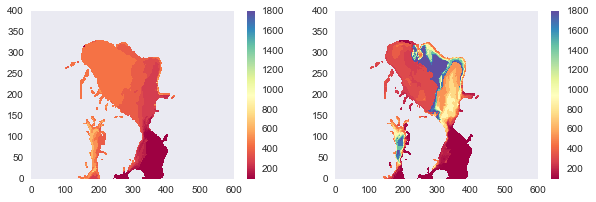

In [10]:
# visualize t-maximum layer
fig=plt.figure(figsize=(10,3))
plt.subplot(121)
plt.pcolor(np.ma.masked_invalid(depth), cmap='Spectral',vmin=100,vmax=1800)
plt.colorbar()
plt.subplot(122)
plt.pcolor(np.ma.masked_invalid(depth2014), cmap='Spectral',vmin=100,vmax=1800)
plt.colorbar()

* layer plot

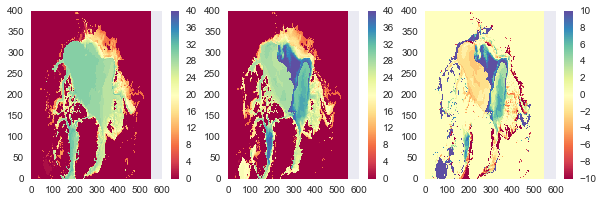

In [11]:
# visualize t-maximum layer
fig=plt.figure(figsize=(10,3))
plt.subplot(131)
plt.pcolor(layer, cmap='Spectral',vmin=0,vmax=40)
plt.colorbar()
plt.subplot(132)
plt.pcolor(layer2014, cmap='Spectral',vmin=0,vmax=40)
plt.colorbar()
plt.subplot(133)
plt.pcolor(layer2014-layer, cmap='Spectral',vmin=-10,vmax=10)
plt.colorbar()

In [22]:
# grid for plotting
x1d=np.linspace(0,nav_lon[:,0].shape[0],nav_lat[:,0].shape[0])
y1d=np.linspace(0,nav_lon[0,:].shape[0],nav_lat[0,:].shape[0])
x2d,y2d=np.meshgrid(y1d,x1d)

In [40]:
# preprae data -- t
def ts_profile(x,y,index, key_s_lim= 'False'):
    
    Temp = np.zeros((2008-1958,50,nav_lon.shape[0],nav_lon.shape[1]))
    for i in range (2008-1958):
        data= hov.load_ts('T',T=i+1958,tmask= tmask, ENG='eng3', key = '_t_')
        Temp[i,...]=data

    temp,coor = section_hovmoller(indexa=x,indexb=y,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)


    # preprae data -- s
    Temp = np.zeros((2008-1958,50,nav_lon.shape[0],nav_lon.shape[1]))
    for i in range (2008-1958):
        data= hov.load_ts('S',T=i+1958,tmask= tmask, ENG='eng3', key = '_s_')
        Temp[i,...]=data
    salinity,coor = section_hovmoller(indexa=x,indexb=y,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)
    
    temp[salinity ==0 ] = np.nan
    salinity[salinity ==0 ] = np.nan
    
    temp=np.ma.masked_invalid(temp)
    salinity=np.ma.masked_invalid(salinity)

    print ('temp maximum (2013): layer %s, depth %s'%(temp[-1,:50.,index].argmax(),dep[temp[-1,:50.,index].argmax()]))
    print ('salinity maximum (2013): layer %s, depth %s'%(salinity[-1,:50.,index].argmax(),dep[salinity[-1,:50.,index].argmax()]))
    
    fig  =  plt.figure(figsize = (18,9/1.2))
    ax = plt.subplot(3,4,1)
    for i,c in zip([10,20,30],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        plt.plot(np.ma.masked_invalid(temp[i,:45.,index]),dep[:45],color=c) #[0,...] means 
    plt.ylim(0,2500)
    plt.gca().invert_yaxis()
    plt.xlabel('temp')

    ax = plt.subplot(3,4,2)
    for i,c in zip([10,20,30],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        plt.plot(np.ma.masked_invalid(salinity[i,:45.,index]),dep[:45],color=c)
    plt.ylim(0,2500)
    plt.gca().invert_yaxis()
    plt.xlabel('salinity')
    
    ax = plt.subplot(3,4,3)
    for i,c in zip([10,20,30],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        t = sw.library.T90conv(temp[i,:50.,index])
        rho = sw.dens0(salinity[i,:50.,index], t)
        plt.plot(np.ma.masked_invalid(rho),dep[:50],label=i+1958,color=c)
    plt.ylim(0,2500)
    plt.xlim(1027.5,1028.5)
    plt.gca().invert_yaxis()
    plt.xlabel('density')
    plt.legend(loc=0)
    
    
    ax = plt.subplot(3,4,4)
    for i,c in zip([10,20,30],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        plt.scatter(np.ma.masked_invalid(salinity[i,:45.,index]),np.ma.masked_invalid(temp[i,:45.,index])\
                    ,color=c,label=i+1958)
    if key_s_lim == 'True':
        plt.xlim(32,35.5)
    plt.xlabel('s')
    plt.ylabel('t')
    plt.legend(loc=2)
    plt.show()

The penetration and subduction of warm, salty water into the Arctic Ocean from the North Atlantic via Fram Strait is clearly evident,

This water forms the Atlantic layer and is dominant feature at a depth of 500m. 

The flow in the Eurasian basin consists of a large single-cell cyclonic gyre. Near the continental shelf break of the Laptev Sea, the Eurasian basian water is seen to flow on  into the Candadian Basian by flowing over the Lomonsov ridge.

# ENG3

# Fram strait

temp maximum (2013): layer 26, depth 222.475
salinity maximum (2013): layer 27, depth 266.04


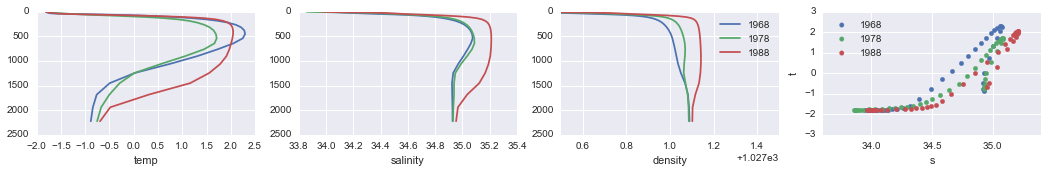

In [39]:
ts_profile(x=x_fs,y=y_fs,index=-5)

# close to Fram strait

temp maximum (2013): layer 32, depth 643.567
salinity maximum (2013): layer 32, depth 643.567


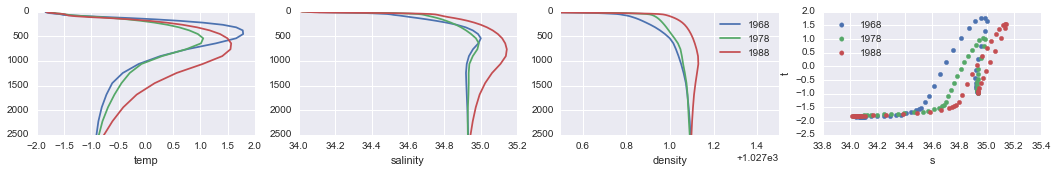

In [25]:
ts_profile(x=x_cb,y=y_cb,index=-10)

* Note that the density profile is ver similar with salinity profiles before I zoomed in. However, in order to take a closer look at depth, I zoomed in the density profile by limiting x lim **from 1027 to 1028.5**. 

# Eurasian Basin 

** (ANNA ->cyan -> Green -> red -> gold -> orange points-> enter MB/LomosovR) **

> On the pathway1 (ANHA --> cyan --> Green ), the temp. max. layer **was pushed down** from 900m to 1600m (due to the loss of buoyancy?). And then the layer **was lifted again**.

> ** Observations provided critical information about the evolution of an unprecedentedly strong AW warm pulse from its entrance into the eastern Arctic Ocean as it decays along its path into the Eurasian Basin interior. (suggests that some other, non-advective forces modulate temperature there)**

> EXH001: for deeper layer, less warmer along the pathway; for upper layer, less cooler along the pathway

temp maximum (2013): layer 33, depth 763.333
salinity maximum (2013): layer 35, depth 1062.44


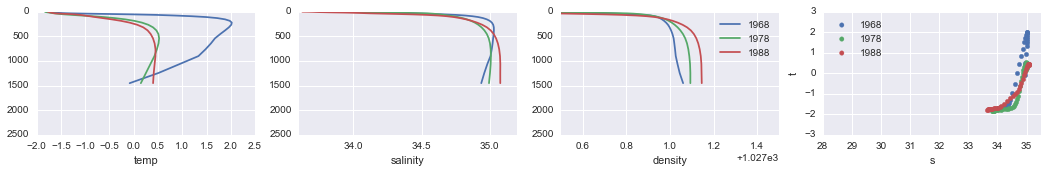

temp maximum (2013): layer 37, depth 1452.25
salinity maximum (2013): layer 40, depth 2225.08


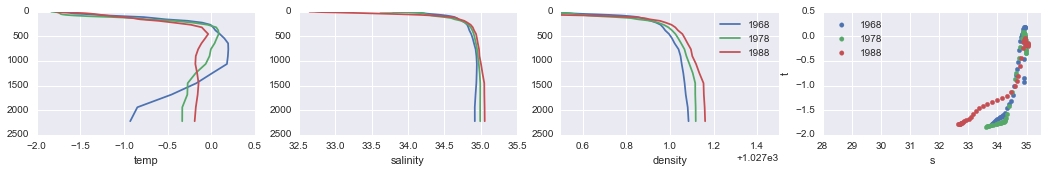

temp maximum (2013): layer 39, depth 1941.89
salinity maximum (2013): layer 41, depth 2533.34


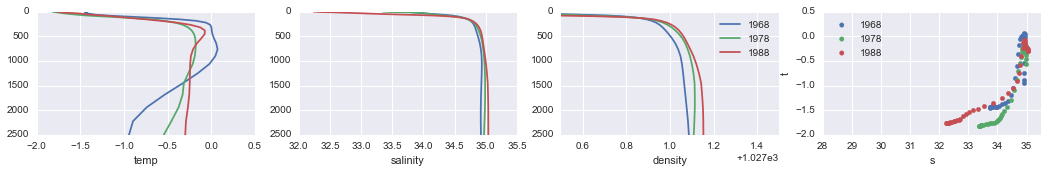

temp maximum (2013): layer 38, depth 1684.28
salinity maximum (2013): layer 40, depth 2225.08


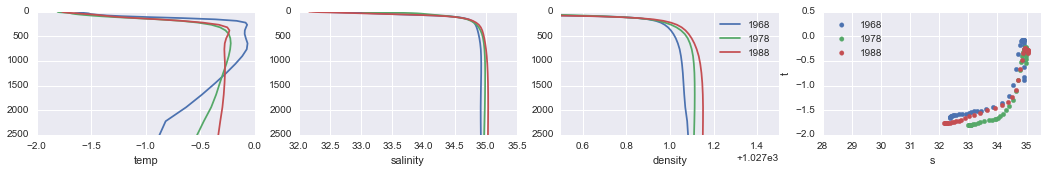

MemoryError: 

In [42]:
ts_profile(x=x_ns,y=y_ns,index=-15,key_s_lim= 'True')
ts_profile(x=x_nb0,y=y_nb0,index=5,key_s_lim= 'True')
ts_profile(x=x_nb1,y=y_nb1,index=0,key_s_lim= 'True')
ts_profile(x=x_nb2,y=y_nb2,index=0,key_s_lim= 'True')
ts_profile(x=x_nb3,y=y_nb3,index=0,key_s_lim= 'True')
ts_profile(x=x_nb4,y=y_nb4,index=0,key_s_lim= 'True')

# Lomonsov Ridge

(black dot)

The profile at the black dot is similar with the orange point (the place where Altantic inflow developed into two arms.) The temp maximum layer is 1245.29, which is at the same depth as the temp. max. at MB.

temp maximum (2013): layer 37, depth 1452.25
salinity maximum (2013): layer 39, depth 1941.89


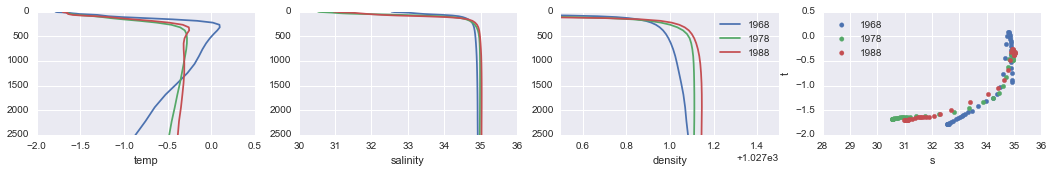

In [27]:
ts_profile(x=x_lr,y=y_lr,index=0, key_s_lim= 'True')

# MB 

(pink -> blue -> purple)

Comparing with profiles on Lomonsov R, this place might have another cooler water mass coming at about 600m.

temp maximum (2013): layer 38, depth 1684.28
salinity maximum (2013): layer 39, depth 1941.89


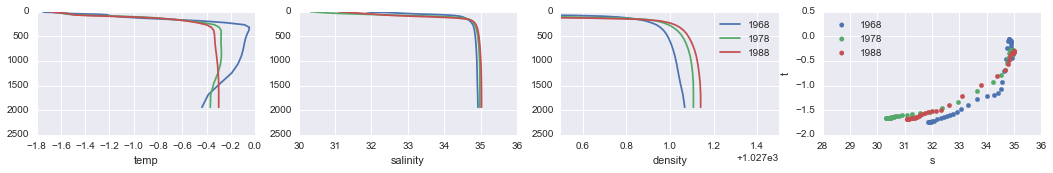

temp maximum (2013): layer 38, depth 1684.28
salinity maximum (2013): layer 38, depth 1684.28


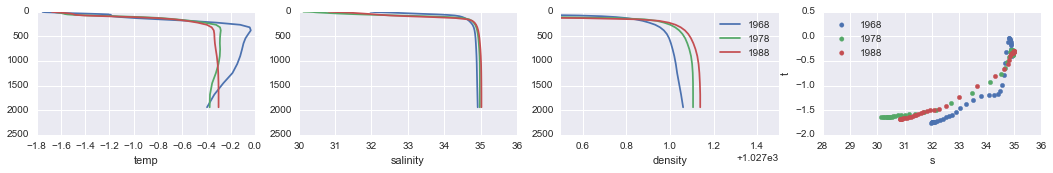

temp maximum (2013): layer 38, depth 1684.28
salinity maximum (2013): layer 39, depth 1941.89


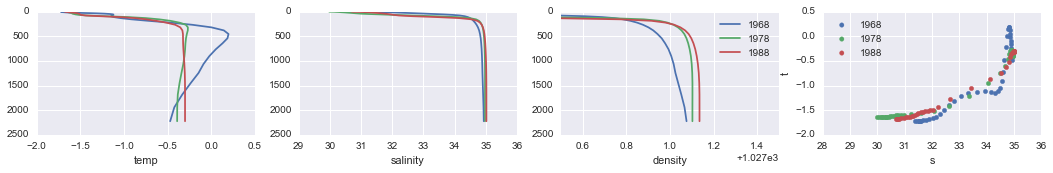

In [28]:
ts_profile(x=x_mb2,y=y_mb2,index=0, key_s_lim= 'True')
ts_profile(x=x_mb,y=y_mb,index=-3, key_s_lim= 'True')
ts_profile(x=x_mb1,y=y_mb1,index=0, key_s_lim= 'True')

# inside CB

temp maximum (2013): layer 28, depth 318.127
salinity maximum (2013): layer 44, depth 3597.03


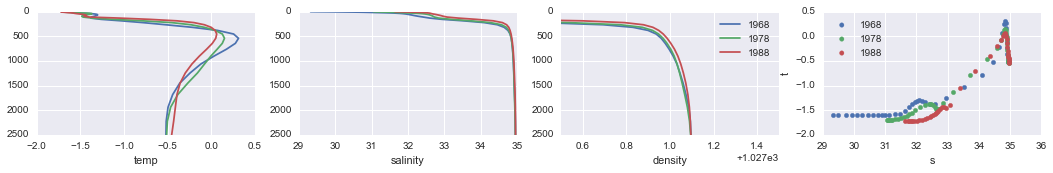

In [35]:
ts_profile(x=x_cb,y=y_cb,index=20)

In [43]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
